# we import the libray that we will be using throughout this exercice
 ## In this exercice we will predict the graduation rate based SAT, acceptance rate, expendidures and top 10 percent of high school

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# special matplotlib argument for improved plots
from matplotlib import rcParams
rcParams['figure.dpi']= 80
sns.set_style("whitegrid")
sns.set_context("poster")

# We will load and read the cvs file into a pandas dataframe

In [101]:
college =pd.read_csv('college.csv')

In [102]:
# We call to see the first 5 elements of the data set
college.head()

,School,Type,MedianSAT,AcceptanceRate,ExpendituresPerStudent,Top10PercentHS,GraduationPercent
0,Amherst,Lib Arts,1315,0.22,26636.0,85,93
1,Barnard,Lib Arts,1220,0.53,17653.0,69,80
2,Bates,Lib Arts,1240,0.36,17554.0,58,88
3,Berkeley,University,1176,0.37,23665.0,95,68
4,Bowdoin,Lib Arts,1300,0.24,25703.0,78,90


In [103]:
# we call tail on the dataframe to see the last 5 elements of the data set
college.tail()

,School,Type,MedianSAT,AcceptanceRate,ExpendituresPerStudent,Top10PercentHS,GraduationPercent
44,Washinton and Lee,Lib Arts,1234,0.29,17998.0,61,78
45,Wellesley,Lib Arts,1250,0.49,27879.0,76,86
46,Wesleyan (CT),Lib Arts,1290,0.35,19948.0,73,91
47,Williams,Lib Arts,1336,0.28,23772.0,86,93
48,Yale,University,1350,0.19,52468.0,90,93


In [104]:
# we call info to determine the data type of each features
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
School                    49 non-null object
Type                      49 non-null object
MedianSAT                 49 non-null int64
AcceptanceRate            49 non-null float64
ExpendituresPerStudent    49 non-null float64
Top10PercentHS            49 non-null int64
GraduationPercent         49 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 2.8+ KB


In [105]:
# we call the function describe on the data set to get the descriptive analytics
college.describe()

,MedianSAT,AcceptanceRate,ExpendituresPerStudent,Top10PercentHS,GraduationPercent
count,49.000000,49.000000,49.000000,49.000000,49.000000
mean,1263.102041,0.381020,30060.326531,74.204082,83.244898
std,62.676499,0.133717,15463.308212,13.550799,7.448519
min,1109.000000,0.170000,15904.000000,47.000000,61.000000
25%,1225.000000,0.280000,20179.000000,65.000000,77.000000
50%,1260.000000,0.360000,24718.000000,76.000000,85.000000
75%,1300.000000,0.480000,37137.000000,85.000000,89.000000
max,1400.000000,0.670000,102262.000000,98.000000,93.000000


 # The result above give the min, max, mean, std, number of elements and etc..

In [106]:
#To do a linear regression we will need the value that we want to predict which is a dependent variable y
# we extract y from the dataframe
# in this cas y holds the graduation rate features that we will predict
y=college.iloc[:,-1].values

In [107]:
# In the same way, we extract x from the dataframe which represent the independent variables
#Median SAT, Acceptance rate, expenditure per student and top 10 % of HS
x=college.iloc[:,2:6].values

# We are applying a multiple linear regression so we will need more than one independent variables

In [110]:
# Let us look at the correlation among the variables
college.corr()

,MedianSAT,AcceptanceRate,ExpendituresPerStudent,Top10PercentHS,GraduationPercent
MedianSAT,1.000000,-0.601902,0.572742,0.503468,0.564147
AcceptanceRate,-0.601902,1.000000,-0.284254,-0.609721,-0.550378
ExpendituresPerStudent,0.572742,-0.284254,1.000000,0.505782,0.042504
Top10PercentHS,0.503468,-0.609721,0.505782,1.000000,0.138613
GraduationPercent,0.564147,-0.550378,0.042504,0.138613,1.000000


In [111]:
#The result above suggest that there is correlation among the vairiables
# for example when the Median SAT increases, the acceptance rate will decrease
# one thing that we noticed is that when the Graduation will decrease when the acceptance rate decreases

In [112]:
# Now we have identified our dependent and independent variables 
# we can create a linear model by call the linear regression object
linearModel =LinearRegression()

In [113]:
# the object linear model is ready, now we will fit the model with x, and y
linearModel.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [114]:
# we print the intercept of the linear model
print('Linear model intercept is:  {} : '.format(linearModel.intercept_))

Linear model intercept is:  17.920955870648484 : 


In [116]:
# we find the number of independent variables in our model 
print('Number of coefficients : {}:'.format(len(linearModel.coef_)))

Number of coefficients : 4:


In [117]:
# we will the first 5 elements
linearModel.predict(x)[0:5]

array([89.69203812, 78.96785372, 86.43788754, 74.72965062, 89.38067195])

In [118]:
# This is the coefficents of each independent variables
print('Linear model coefficients :{}'.format(linearModel.coef_))

Linear model coefficients :[ 7.20062848e-02 -2.48592318e+01 -1.35649860e-04 -1.62764489e-01]


# The linear equation  is :
#graduation rate = 0.072 * MedianSAT -24.85 * AcceptanceRate -0.000135 * Expenditures -0.1627 * Top10PercentHS +17.92

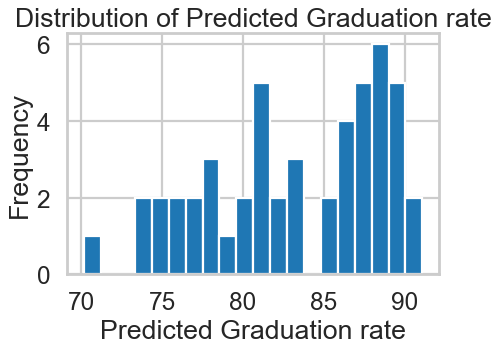

In [122]:
# we plot the histogramme of the predicted graduation rate
plt.hist(linearModel.predict(x),bins=20)
plt.xlabel("Predicted Graduation rate")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Graduation rate");


Text(0.5, 1.0, 'Relationship between Accepatance rate and graduation')

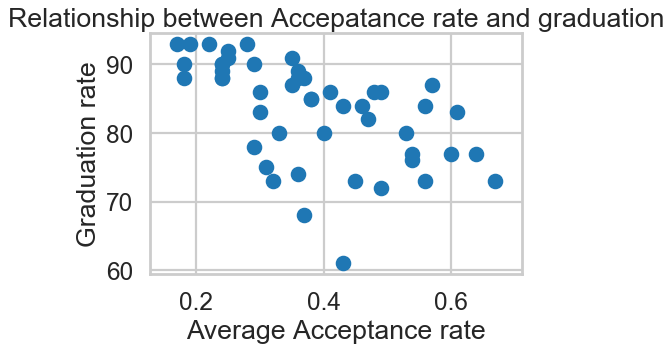

In [123]:

# we plot the scatter chart of acceptance rate againt graduation rate
plt.scatter(college.AcceptanceRate, college.GraduationPercent)
plt.xlabel("Average Acceptance rate")
plt.ylabel("Graduation rate")
plt.title("Relationship between Accepatance rate and graduation")

Text(0.5, 1.0, 'Relationship between Median SAT and graduation rate')

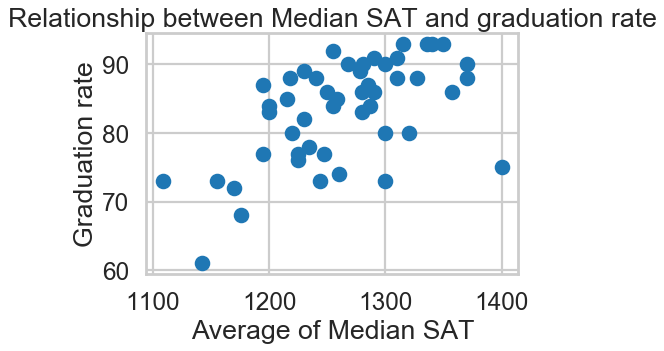

In [124]:
# we plot the scatter chart of Median SAT againt graduation rate
plt.scatter(college.MedianSAT, college.GraduationPercent)
plt.xlabel("Average of Median SAT")
plt.ylabel("Graduation rate")
plt.title("Relationship between Median SAT and graduation rate")

Text(0.5, 1.0, 'Relationship between Expenditures per student and graduation rate')

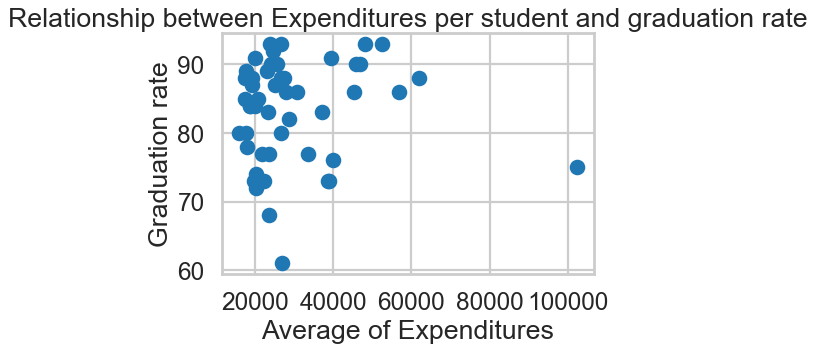

In [125]:
# we plot the scatter chart of acceptance rate againt graduation rate

plt.scatter(college.ExpendituresPerStudent, college.GraduationPercent)
plt.xlabel("Average of Expenditures")
plt.ylabel("Graduation rate")
plt.title("Relationship between Expenditures per student and graduation rate")

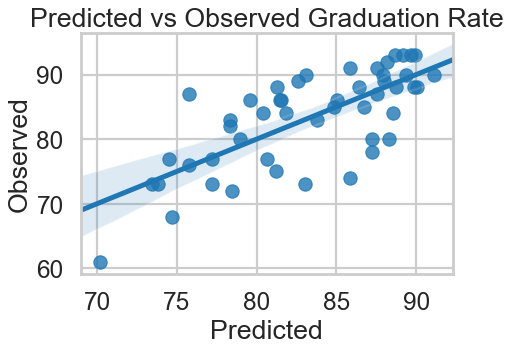

In [126]:
# We plot the relationship between observed and predicted graduation rate 
sns.regplot(x=linearModel.predict(x), y=college.GraduationPercent)
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title(('Predicted vs Observed Graduation Rate'));

 Reference for this is  http://localhost:8888/notebooks/Desktop/Data%20Analytics%202/shared%20NYU%20ADA-II%20S2.3%20Linear_Regression.ipynb